In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import cProfile
import pstats


DATASET_URL = "https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json"

df = pd.read_json(DATASET_URL)

df.head()

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029


In [12]:
from plotter import Plotter

plotter = Plotter()
a= plotter.draw_plots(DATASET_URL)
print(a)

['plots\\boxplot_deviations.png', 'plots\\scatter_deviations_vs_corners.png', 'plots\\pie_chart_correct_predictions.png']


In [3]:

def build_plots():
    plots_dir = 'plots'

    plot_files = [
        'boxplot_deviations.png',
        'scatter_deviations_vs_corners.png',
        'pie_chart_correct_predictions.png'
    ]

    figsize = (25, 6)

    fig, axs = plt.subplots(1, 3, figsize=figsize)

    for i, plot_file in enumerate(plot_files):
        plot_path = os.path.join(plots_dir, plot_file)
        if os.path.exists(plot_path):
            img = plt.imread(plot_path)
            axs[i].imshow(img)
            axs[i].axis('off')  
        else:
            axs[i].text(0.5, 0.5, f"{plot_file} not found", ha='center', va='center')
            axs[i].axis('off')

    plt.show()



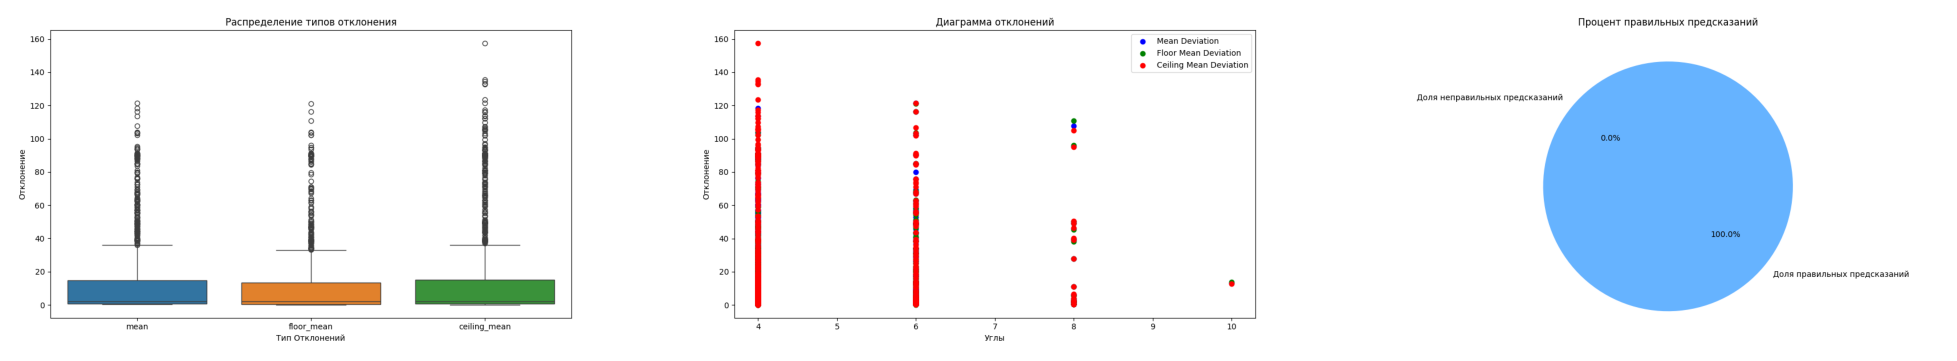

         340204 function calls (331730 primitive calls) in 10.690 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  2187/10    8.909    0.004    0.000    0.000 {method 'acquire' of '_thread.lock' objects}
  609/304    0.542    0.001    0.013    0.000 {built-in method select.select}
       12    0.113    0.009    0.115    0.010 {built-in method matplotlib._image.resample}
    329/3    0.099    0.000    0.000    0.000 c:\Python312\Lib\threading.py:323(wait)
       71    0.049    0.001    0.049    0.001 {built-in method time.sleep}
      116    0.032    0.000    0.032    0.000 {method 'encode' of 'ImagingEncoder' objects}
        6    0.025    0.004    0.025    0.004 c:\Python312\Lib\site-packages\matplotlib\image.py:217(_rgb_to_rgba)
1563/1017    0.023    0.000    0.019    0.000 C:\Users\vladt\AppData\Roaming\Python\Python312\site-packages\zmq\sugar\socket.py:626(send)
       54    0.019    0.000    0.019    0.000 {method 're

In [13]:
with cProfile.Profile() as profile:
    build_plots()

    results = pstats.Stats(profile)
    results.sort_stats(pstats.SortKey.TIME)
    results.print_stats()